# 당뇨병 데이터셋으로 **다중회귀**
0. 어떤 feature가 당뇨병과 가장 연관이 깊은지
1. test_size = 0.1
2. LinearRegression vs DecisionTreeRegression
3. 모델 성능 MSE

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print('총 사례 :', len(df),'\n결측 자료 :\n',df.isnull().sum())

총 사례 : 442 
결측 자료 :
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


---
>회귀분석에서 독립변수간의 상관관계가 높으면 개별 변수의 영향을 평가하기 어려움.  
**다중공선성문제(Multicollinearity)** 는 독립변수 사이에 강한 상관관계가 나타나는 문제.  
~~를 찾아보다가 말았으니 마저~~


In [4]:
df.corr() # 상관행렬

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


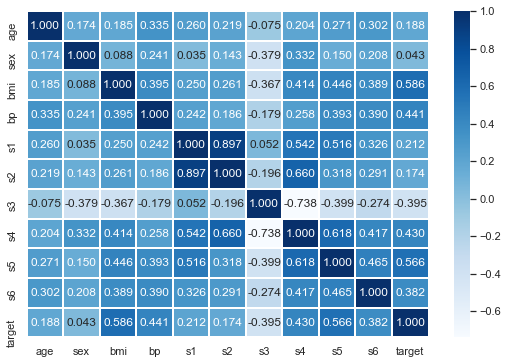

In [5]:
import matplotlib.pyplot as plt         # 윗 셀의 상관행렬을 히트맵으로
import seaborn as sns
sns.set(rc = {'figure.figsize':(9,6)})
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', fmt=".3f", linewidths=1)
plt.show()

In [6]:
#  target과의 상관성이 높은 상위 4개 항목
df.corr()['target'].sort_values(ascending=False).head(5)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
Name: target, dtype: float64

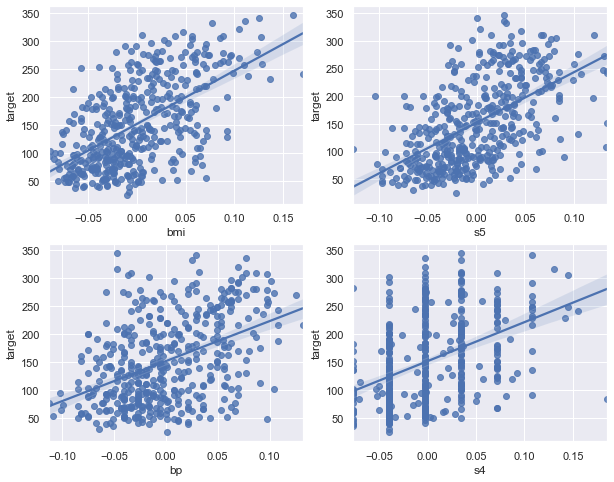

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.regplot(x='bmi', y='target', data=df, ax=axs[0][0])
sns.regplot(x='s5', y='target', data=df, ax=axs[0][1])
sns.regplot(x='bp', y='target', data=df, ax=axs[1][0])
sns.regplot(x='s4', y='target', data=df)
plt.show()

In [8]:
X = diabetes.data
y = diabetes.target

In [9]:
# 선형회귀모델로 당뇨병과의 연관성
a = {}              # 수치가 높은 순으로 feature를 한 번에 정렬하기 위해 딕셔너리로 만들기로 함
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    a[feature] = round(lr.score(X, y), 4)
lr_fe = sorted(a.items(), key=lambda x: x[1], reverse=True)    # 딕셔너리 키값 기준 내림차순 정렬
lr_fe

[('bmi', 0.3439),
 ('s5', 0.3202),
 ('bp', 0.1949),
 ('s4', 0.1853),
 ('s3', 0.1559),
 ('s6', 0.1463),
 ('s1', 0.045),
 ('age', 0.0353),
 ('s2', 0.0303),
 ('sex', 0.0019)]

In [10]:
# 의사결정트리회귀
a = {}
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    dtr = DecisionTreeRegressor()
    dtr.fit(X, y)
    a[feature] = round(dtr.score(X, y), 4)
dtr_fe = sorted(a.items(), key=lambda x: x[1], reverse=True)
dtr_fe

[('s2', 0.7229),
 ('s5', 0.5953),
 ('bmi', 0.5809),
 ('bp', 0.3705),
 ('s1', 0.3417),
 ('s4', 0.3119),
 ('s3', 0.2702),
 ('s6', 0.2677),
 ('age', 0.1409),
 ('sex', 0.0019)]

---

- 데이터 세트 분리

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

---

### LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.score(X_test,y_test)

0.12182329052160201

In [14]:
# 회귀식의 기울기, 절편
lr.coef_, lr.intercept_

(array([622.16835819]), 150.91147064038952)

In [15]:
np.dot(lr.coef_, X_test[0]) + lr.intercept_

155.39513707318278

In [16]:
for i in range(5):
    pred_lr = np.dot(lr.coef_, X_test[i]) + lr.intercept_
    print(f'예측값: {pred_lr:.2f}, 실제값: {y_test[i]}')

예측값: 155.40, 실제값: 155.0
예측값: 168.28, 실제값: 167.0
예측값: 142.51, 실제값: 185.0
예측값: 152.82, 실제값: 109.0
예측값: 109.01, 실제값: 65.0


In [17]:
lr.predict(X_test[:5])

array([155.39513707, 168.28057637, 142.50969778, 152.81804921,
       109.00755562])

---

- DecisionTreeRegressor

In [18]:
dtr = DecisionTreeRegressor(random_state=2021) # 실행할 때마다 값이 바뀌어서 고정
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2021)

In [19]:
pred_dtr = dtr.predict(X_test)

In [20]:
# dtr.score(X_test,y_test)

In [21]:
# r2_score(y_test, pred_dtr)

---

In [23]:
mse_lr = mean_squared_error(y_test, pred_lr)
mse_dtr = mean_squared_error(y_test, pred_dtr)
print(f'MSE - LR: {mse_lr:.4f}, DTR: {mse_dtr:.4f}')

TypeError: Singleton array 109.00755561764996 cannot be considered a valid collection.

In [ ]:
mse = mean_squared_error(y_test, pred_dtr)
mse

4057.1031143867044

In [1]:
# R2 score 찾아보기

- 모델 정확도 평가(*참고*  )

>잔차분석  
>잔차 : 실제 값 y와 예측된 값 ŷ의 차 e
$$e=y-\widehat{y}$$
>사이킷런의 선형회귀 모델 생성하여 .score() 사용 시 R²라는 결정계수 반환  
>결정계수가 클수록 실제값과 예측값이 유사함을 의미
$$R^2=1-\frac{u}{v}$$